Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras.models import load_model

Loading the Data

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 6s 1us/step


In [3]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Analyzing the data

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]

5

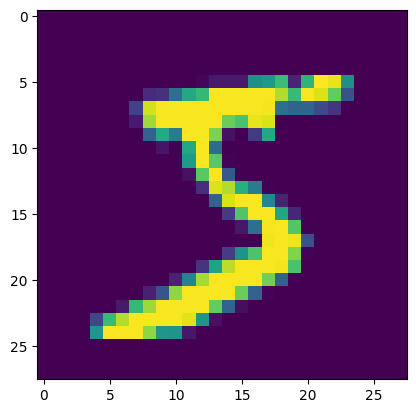

In [6]:
plt.imshow(X_train[0])

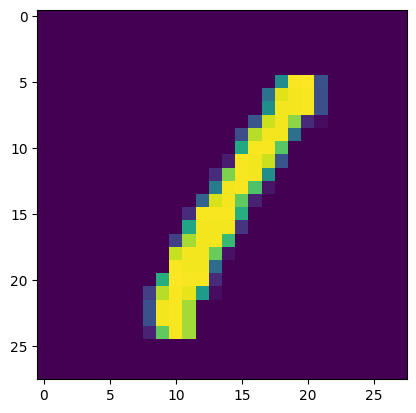

In [7]:
plt.imshow(X_train[3])

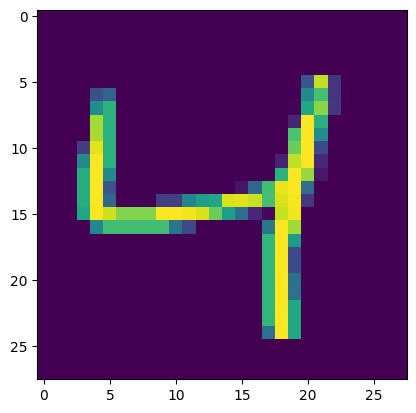

In [8]:
plt.imshow(X_train[2])

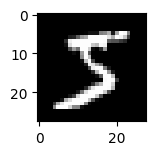

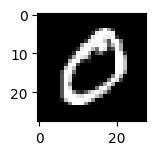

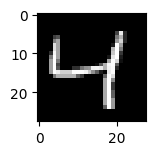

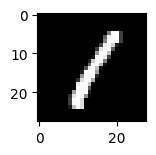

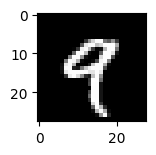

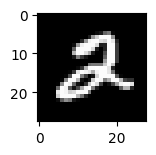

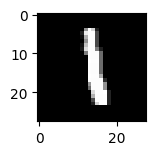

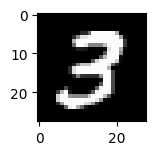

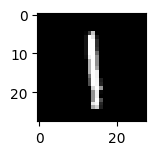

In [9]:
for i in range(9):
    plt.subplot(330 + 1 +i)
    plt.imshow(X_train[i], cmap = plt.get_cmap('gray'))
    plt.show()

Reshaping the data

In [10]:
X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [11]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [12]:
X_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

Applying One Hot Encoding

In [13]:
number_of_classes = 20

In [14]:
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

model creation

In [17]:
model = Sequential()

Add CNN layer

In [18]:
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(number_of_classes,activation="softmax"))

In [19]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
Total params: 111,284
Trainable params: 111,284
Non-trainable params: 0
__________________________________________________

Model compilation

In [20]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

Train the model

In [21]:
model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test),batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2421 - accuracy: 0.9492 - val_loss: 0.0826 - val_accuracy: 0.9738
Epoch 2/20
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0728 - accuracy: 0.9771 - val_loss: 0.1020 - val_accuracy: 0.9714
Epoch 3/20
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0688 - val_accuracy: 0.9805
Epoch 4/20
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0430 - accuracy: 0.9865 - val_loss: 0.0636 - val_accuracy: 0.9813
Epoch 5/20
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0363 - accuracy: 0.9893 - val_loss: 0.0736 - val_accuracy: 0.9819
Epoch 6/20
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.0652 - val_accuracy: 0.9848
Epoch 7/20
1875/1875 [==============================] - 72s 39ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0878 -

Observing the metrics

In [22]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

Metrics(Test Loss & Test Accuracy):
[0.2196120321750641, 0.9818000197410583]


Test The Model

In [23]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 78ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.7806289e-35 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.3047179e-31 6.0896618e-27
  3.9810698e-36 0.0000000e+00 2.5598542e-35 2.5341181e-34 3.5462590e-35
  5.3804215e-36 5.4180358e-34 2.0159099e-34 6.5796316e-32 2.0098265e-36]
 [4.6068561e-38 9.1112090e-33 1.0000000e+00 4.1086336e-36 0.0000000e+00
  0.0000000e+00 1.8162348e-26 0.0000000e+00 1.2508668e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.8518902e-38 6.8683865e-38 2.2611377e-38
  0.0000000e+00 9.7523423e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7005425e-25 1.0000000e+00 7.4227976e-20 5.9977418e-35 4.5604667e-16
  7.3334790e-24 1.9008171e-16 1.6020086e-11 6.1386007e-10 5.2471727e-20
  6.0778615e-23 7.3594687e-21 1.2455577e-19 2.1375903e-20 2.3223955e-20
  7.8391396e-20 4.0964911e-20 1.0467796e-24 5.7344741e-19 1.3567313e-19]
 [1.0000000e+00 0.0000000e+00 2.3027175e-25 5.1322106e-37 0.0000000e+00
  0.00000

In [24]:
print(np.argmax(prediction,axis = 1))
print(y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Observing The Metrics

In [25]:
metrics=model.evaluate(X_test,y_test,verbose=1)
print("Metrics(Test Loss & Test Accuracy):")
print(metrics)

313/313 [==============================] - 2s 5ms/step - loss: 0.2196 - accuracy: 0.9818
Metrics(Test Loss & Test Accuracy):
[0.2196120321750641, 0.9818000197410583]


Test The Model

In [26]:
prediction = model.predict(X_test[1:5])
print(prediction)

1/1 [==============================] - 0s 16ms/step
[[4.6068561e-38 9.1112090e-33 1.0000000e+00 4.1086336e-36 0.0000000e+00
  0.0000000e+00 1.8162348e-26 0.0000000e+00 1.2508668e-34 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.8518902e-38 6.8683865e-38 2.2611377e-38
  0.0000000e+00 9.7523423e-38 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.7005425e-25 1.0000000e+00 7.4227976e-20 5.9977418e-35 4.5604667e-16
  7.3334790e-24 1.9008171e-16 1.6020086e-11 6.1386007e-10 5.2471727e-20
  6.0778615e-23 7.3594687e-21 1.2455577e-19 2.1375903e-20 2.3223955e-20
  7.8391396e-20 4.0964911e-20 1.0467796e-24 5.7344741e-19 1.3567313e-19]
 [1.0000000e+00 0.0000000e+00 2.3027175e-25 5.1322106e-37 0.0000000e+00
  0.0000000e+00 5.4583659e-26 2.1886167e-34 1.3571637e-30 2.1599073e-30
  0.0000000e+00 1.0612046e-33 4.6051693e-38 1.6685636e-37 6.5329924e-38
  6.4384340e-38 3.0262792e-38 1.2327053e-34 4.3492272e-36 2.0938766e-38]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.00000

In [27]:
print(np.argmax(prediction,axis = 1))
print(y_test[1:5])

[2 1 0 4]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Save The Model

In [28]:
model.save("MNIST.h5")